# Calculating Regression Metrics

In [1]:
# import packages
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
house_prices_reg = pd.read_csv('boston_house_prices_regression.csv')
house_prices_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,y
0,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,-1.0,22.507577,27.08,19.40,23.4
1,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,-1.0,16.238796,17.46,16.55,8.1
2,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,-1.0,27.423950,21.84,28.20,22.0
3,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,-1.0,20.939772,10.50,28.20,15.0
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,-1.0,11.319594,14.70,10.20,10.4


In [3]:
# load the model
reg = pickle.load(open('stacked_linear_regression.sav', 'rb'))

In [4]:
# import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [5]:
# use the load model to make prediction
X = house_prices_reg.iloc[:, 0:11]
y = house_prices_reg['y'].values
y_pred = reg.predict(X)

In [6]:
# Calculate the MAE, RMSE e R2_squared
print(f'Mean Absolute Error (MAE) = {mean_absolute_error(y, y_pred)}')
print(f'Root Mean Squared Error (RSME) = {mean_squared_error(y, y_pred)}')
print(f'R2 squared = {r2_score(y, y_pred)}')

Mean Absolute Error (MAE) = 20.995098039215687
Root Mean Squared Error (RSME) = 526.5918627450981
R2 squared = -5.13759731826339


# Calculating Classification Metrics

In [7]:
# load data
titanic_clf = pd.read_csv('titanic_classification.csv')
titanic_clf.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Survived
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,0,38.0,1,0,71.2833,1,0,0,1
2,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,0,35.0,1,0,53.1000,0,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,1,0


In [8]:
# load the model
rf = pickle.load(open('random_forest_clf.sav', 'rb'))

In [9]:
# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [10]:
# useing the model to make predictions
X = titanic_clf.iloc[:, :-1]
y = titanic_clf.iloc[:, -1]
y_pred = rf.predict(X)
#y_preds_probs = rf.predict_probs(X)

In [11]:
# Calculate accuracy
print(f'Accuracy Score = {accuracy_score(y, y_pred)}')

Accuracy Score = 0.6464646464646465


In [12]:
print(confusion_matrix(y_true=y, y_pred=y_pred))

[[547   2]
 [313  29]]


In [13]:
# calculate precision, recall and f1_score
print(f'Precision score = {precision_score(y, y_pred)}')
print(f'Recall score = {recall_score(y, y_pred)}')
print(f'F1 score = {f1_score(y, y_pred)}')

Precision score = 0.9354838709677419
Recall score = 0.0847953216374269
F1 score = 0.15549597855227879


# Performing K-Fold Cross-Validation with Stratified Sampling

In [14]:
# import packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [15]:
# prepare the data
X = titanic_clf.iloc[:, :-1]
y = titanic_clf.iloc[:, -1]

In [16]:
# initialize the KFold object
skf = StratifiedKFold(n_splits=5)

In [17]:
# Train a classifier for each fold and record the score
scores = []

from sklearn.model_selection import train_test_split

for train_index, val_index in skf.split(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y)
    
    rf_skf = RandomForestClassifier(**rf.get_params())
    rf_skf.fit(X_train, y_train)
    
    y_pred = rf_skf.predict(X_val)
    
    scores.append(accuracy_score(y_val, y_pred))
scores

[0.7130044843049327,
 0.6681614349775785,
 0.6995515695067265,
 0.7892376681614349,
 0.726457399103139]

In [18]:
# calculate aggregated accuracy score
print(f'Mean Accuracy Score = {np.mean(scores)}')

Mean Accuracy Score = 0.7192825112107623


# Hyperparameter Tuning with Random Search

In [19]:
# import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [20]:
# prepare data
X = titanic_clf.iloc[:, :-1]
y = titanic_clf.iloc[:, -1]

In [21]:
# iniciate the model
rf_rand = RandomForestClassifier()

In [22]:
def report(results, max_rank=3):
    for rank in range(1, max_rank+1):
        results_at_rank = np.flatnonzero(results['rank_test_score'] == i)
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [23]:
# defining the space of hyperparameters
param_dist = {"n_estimators": list(range(10,210,10)),
              "max_depth": list(range(3,20)),
              "max_features": list(range(1, 10)),
              "min_samples_split": list(range(2, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [24]:
# create the model
n_iter_search = 60
random_search = RandomizedSearchCV(rf_rand,
                                  param_distributions=param_dist,
                                  scoring='accuracy',
                                  n_iter=n_iter_search,
                                  cv=5)
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=60,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                              

In [25]:
# print the scores and hyperparameters for the top five models
results = pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')
for i, row in results.head().iterrows():
    print(f"Model rank: {row.rank_test_score}")
    print(f"Mean validation score: {round(row.mean_test_score, 3)} (std: {round(row.std_test_score, 3)})")
    print(f"Model Hyperparameters: {row.params}\n")

Model rank: 1
Mean validation score: 0.725 (std: 0.054)
Model Hyperparameters: {'n_estimators': 130, 'min_samples_split': 9, 'max_features': 8, 'max_depth': 6, 'criterion': 'entropy', 'bootstrap': True}

Model rank: 2
Mean validation score: 0.725 (std: 0.045)
Model Hyperparameters: {'n_estimators': 120, 'min_samples_split': 4, 'max_features': 9, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': True}

Model rank: 3
Mean validation score: 0.724 (std: 0.053)
Model Hyperparameters: {'n_estimators': 190, 'min_samples_split': 9, 'max_features': 4, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}

Model rank: 4
Mean validation score: 0.721 (std: 0.046)
Model Hyperparameters: {'n_estimators': 130, 'min_samples_split': 6, 'max_features': 5, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}

Model rank: 5
Mean validation score: 0.721 (std: 0.039)
Model Hyperparameters: {'n_estimators': 60, 'min_samples_split': 5, 'max_features': 2, 'max_depth': 10, 'criterion': 'entropy', 'b

In [26]:
# generate the report
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.725 (std: 0.054)
Parameters: {'n_estimators': 130, 'min_samples_split': 9, 'max_features': 8, 'max_depth': 6, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.725 (std: 0.045)
Parameters: {'n_estimators': 120, 'min_samples_split': 4, 'max_features': 9, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.724 (std: 0.053)
Parameters: {'n_estimators': 190, 'min_samples_split': 9, 'max_features': 4, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}



# Feature Importance using Random Forest

In [27]:
# find feature importance
feat_imps = pd.DataFrame({'importance':rf.feature_importances_}, index=titanic_clf.columns[:-1])
feat_imps.sort_values(by='importance', ascending=False, inplace=True)

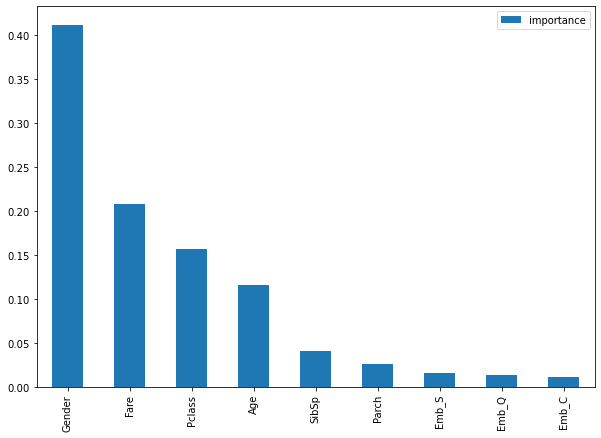

In [28]:
# plot feature importance
feat_imps.plot(kind='bar', figsize=(10,7))
plt.legend()
plt.show()